## D208 - Predictive Modeling

### Import Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import statsmodels.api as sm
# from pandas import DataFrame
# from sklearn.metrics import mean_absolute_error

### Load Data From medical_clean.csv

In [75]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County    Zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        Lat       Lng  ...  TotalCharge Additional_charges Item1 Item2  Item3  \
0  34.34960 -86.72508  ...  3726.702860       17939.403420     3     3      2   
1  30.84513 -85.22907  ...  4193.190458       17612.998120     3     4      3   
2  43.54321 -96.63772  ...  2434.234222       17505.192460     2     4      4   
3  43.89744 -93.51479  ...  2127.830423       12993.437350     3     5      5   
4  37.59894 -76.88958  ...  2113.073274        3716.525786     2     1      3   

   Item4  Item5 Item6 Item7 Item8  
0      2      4     3     3     4  
1      4      4     4     3     3  
2      4      3     4     3     3  
3      3      4     5     5     5  
4      3      5     3     4     3  

[5 rows x 50 columns]

---
### Exploratory Data Analysis
---

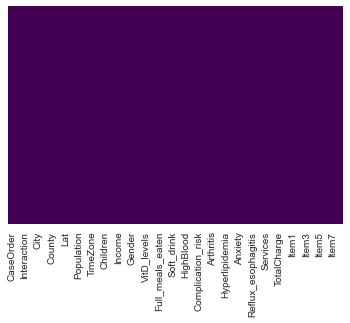

In [76]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [77]:
sns.set_style('whitegrid')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

---
## **Data Exploration**
---

### Describe and Explore Numeric Fields:

In [79]:
df.describe(include = [np.number])

CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900     38.751099    -91.243080    9965.253800   
std     2886.89568  27469.588208      5.403085     15.205998   14824.758614   
min        1.00000    610.000000     17.967190   -174.209700       0.000000   
25%     2500.75000  27592.000000     35.255120    -97.352982     694.750000   
50%     5000.50000  50207.000000     39.419355    -88.397230    2769.000000   
75%     7500.25000  72411.750000     42.044175    -80.438050   13945.000000   
max    10000.00000  99929.000000     70.560990    -65.290170  122814.000000   

           Children           Age         Income   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.097200     53.511700   40490.495160     17.964262      5.012200   
std        2.163659     20.638538   28521.153293      2.017231      1.045734   
min        0.000000     18.000000     154.080000      9.806483      1.000000   
25%        0.000000     36.000000   19598.775000     16.626439      4.000000   
50%        1.000000     53.000000   33768.420000     17.951122      5.000000   
75%        3.000000     71.000000   54296.402500     19.347963      6.000000   
max       10.000000     89.000000  207249.100000     26.394449      9.000000   

       ...   TotalCharge  Additional_charges         Item1         Item2  \
count  ...  10000.000000        10000.000000  10000.000000  10000.000000   
mean   ...   5312.172769        12934.528587      3.518800      3.506700   
std    ...   2180.393838         6542.601544      1.031966      1.034825   
min    ...   1938.312067         3125.703000      1.000000      1.000000   
25%    ...   3179.374015         7986.487755      3.000000      3.000000   
50%    ...   5213.952000        11573.977735      4.000000      3.000000   
75%    ...   7459.699750        15626.490000      4.000000      4.000000   
max    ...   9180.728000        30566.070000      8.000000      7.000000   

              Item3         Item4         Item5         Item6         Item7  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.511100      3.515100      3.496900      3.522500      3.494000   
std        1.032755      1.036282      1.030192      1.032376      1.021405   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      4.000000      3.000000      4.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        8.000000      7.000000      7.000000      7.000000      7.000000   

              Item8  
count  10000.000000  
mean       3.509700  
std        1.042312  
min        1.000000  
25%        3.000000  
50%        3.000000  
75%        4.000000  
max        7.000000  

[8 rows x 23 columns]

In [80]:
df_num = df.select_dtypes(include='number')
df_num.head()

CaseOrder    Zip       Lat       Lng  Population  Children  Age    Income  \
0          1  35621  34.34960 -86.72508        2951         1   53  86575.93   
1          2  32446  30.84513 -85.22907       11303         3   51  46805.99   
2          3  57110  43.54321 -96.63772       17125         3   53  14370.14   
3          4  56072  43.89744 -93.51479        2162         0   78  39741.49   
4          5  23181  37.59894 -76.88958        5287         1   22   1209.56   

   VitD_levels  Doc_visits  ...  TotalCharge  Additional_charges  Item1  \
0    19.141466           6  ...  3726.702860        17939.403420      3   
1    18.940352           4  ...  4193.190458        17612.998120      3   
2    18.057507           4  ...  2434.234222        17505.192460      2   
3    16.576858           4  ...  2127.830423        12993.437350      3   
4    17.439069           5  ...  2113.073274         3716.525786      2   

   Item2  Item3  Item4  Item5  Item6  Item7  Item8  
0      3      2      2      4      3      3      4  
1      4      3      4      4      4      3      3  
2      4      4      4      3      4      3      3  
3      5      5      3      4      5      5      5  
4      1      3      3      5      3      4      3  

[5 rows x 23 columns]

In [81]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

Customer_id                           Interaction  \
0     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                                UID          City State        County  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William   

       Area          TimeZone                               Job   Marital  \
0  Suburban   America/Chicago  Psychologist, sport and exercise  Divorced   
1     Urban   America/Chicago      Community development worker   Married   
2  Suburban   America/Chicago           Chief Executive Officer   Widowed   
3  Suburban   America/Chicago               Early years teacher   Married   
4     Rural  America/New_York       Health promotion specialist   Widowed   

   ... Overweight Arthritis Diabetes Hyperlipidemia BackPain Anxiety  \
0  ...         No       Yes      Yes             No      Yes     Yes   
1  ...        Yes        No       No             No       No      No   
2  ...        Yes        No      Yes             No       No      No   
3  ...         No       Yes       No             No       No      No   
4  ...         No        No       No            Yes       No      No   

  Allergic_rhinitis Reflux_esophagitis Asthma     Services  
0               Yes                 No    Yes   Blood Work  
1                No                Yes     No  Intravenous  
2                No                 No     No   Blood Work  
3                No                Yes    Yes   Blood Work  
4               Yes                 No     No      CT Scan  

[5 rows x 27 columns]

In [82]:
df_num.columns

Index(['CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age',
       'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [83]:
df_cat.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services'],
      dtype='object')

In [84]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

### Looking for Nulls:

In [85]:
print("Are there any rows with nulls: " + str(df.isnull().all(axis=1).any()))

Are there any rows with nulls: False


In [86]:
df.loc[:, df.isnull().any()]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10000 rows x 0 columns]

---
##  **Part 1: Research Question:**
### [A1] **Question:** "Do the following three predictors: Initial Days, Age, and Initial Admin explain the variation in Patient Readmissions?"

---
### **Part III: Data Preparation**
---

In [46]:
#https://stackoverflow.com/questions/24524104/pandas-describe-is-not-returning-summary-of-all-columns
# Describe Numeric Fields
df.describe(include = [np.number])

CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900     38.751099    -91.243080    9965.253800   
std     2886.89568  27469.588208      5.403085     15.205998   14824.758614   
min        1.00000    610.000000     17.967190   -174.209700       0.000000   
25%     2500.75000  27592.000000     35.255120    -97.352982     694.750000   
50%     5000.50000  50207.000000     39.419355    -88.397230    2769.000000   
75%     7500.25000  72411.750000     42.044175    -80.438050   13945.000000   
max    10000.00000  99929.000000     70.560990    -65.290170  122814.000000   

           Children           Age         Income   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean       2.097200     53.511700   40490.495160     17.964262      5.012200   
std        2.163659     20.638538   28521.153293      2.017231      1.045734   
min        0.000000     18.000000     154.080000      9.806483      1.000000   
25%        0.000000     36.000000   19598.775000     16.626439      4.000000   
50%        1.000000     53.000000   33768.420000     17.951122      5.000000   
75%        3.000000     71.000000   54296.402500     19.347963      6.000000   
max       10.000000     89.000000  207249.100000     26.394449      9.000000   

       ...  Additional_charges         Item1         Item2         Item3  \
count  ...        10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...        12934.528587      3.518800      3.506700      3.511100   
std    ...         6542.601544      1.031966      1.034825      1.032755   
min    ...         3125.703000      1.000000      1.000000      1.000000   
25%    ...         7986.487755      3.000000      3.000000      3.000000   
50%    ...        11573.977735      4.000000      3.000000      4.000000   
75%    ...        15626.490000      4.000000      4.000000      4.000000   
max    ...        30566.070000      8.000000      7.000000      8.000000   

              Item4         Item5         Item6         Item7         Item8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.515100      3.496900      3.522500      3.494000      3.509700   
std        1.036282      1.030192      1.032376      1.021405      1.042312   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      4.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      7.000000      7.000000      7.000000      7.000000   

                Yes  
count  10000.000000  
mean       0.366900  
std        0.481983  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 24 columns]

In [43]:
# Describe Categorical Fields
df.describe(include = ['O'])

Customer_id                           Interaction  \
count        10000                                 10000   
unique       10000                                 10000   
top         T85305  0321cdb8-18ae-420c-a3d2-41f91135a97b   
freq             1                                     1   

                                     UID     City  State     County   Area  \
count                              10000    10000  10000      10000  10000   
unique                             10000     6072     52       1607      3   
top     abbf66742e0c35cb8d8fabc4dfb6259d  Houston     TX  Jefferson  Rural   
freq                                   1       36    553        118   3369   

                TimeZone                                   Job  Marital  ...  \
count              10000                                 10000    10000  ...   
unique                26                                   639        5  ...   
top     America/New_York  Outdoor activities/education manager  Widowed  ...   
freq                3889                                    29     2045  ...   

       Overweight Arthritis Diabetes Hyperlipidemia BackPain Anxiety  \
count       10000     10000    10000          10000    10000   10000   
unique          2         2        2              2        2       2   
top           Yes        No       No             No       No      No   
freq         7094      6426     7262           6628     5886    6785   

       Allergic_rhinitis Reflux_esophagitis Asthma    Services  
count              10000              10000  10000       10000  
unique                 2                  2      2           4  
top                   No                 No     No  Blood Work  
freq                6059               5865   7107        5265  

[4 rows x 27 columns]

### Univatate Visualizations

Text(0.5, 1.0, 'Readmissions')

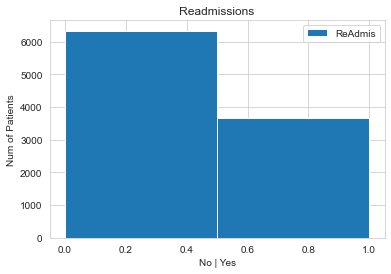

In [26]:
# Univariate: Readmissions
readmis = []
for value in train['ReAdmis']:
    
    if value == 'Yes':
        readmis.append(1)
    elif value == 'No':
        readmis.append(0)
        
train['ReAdmis'] = readmis
train[['ReAdmis']].plot.hist(bins=2);

plt.xlabel('No | Yes')
plt.ylabel('Num of Patients')
plt.title('Readmissions')

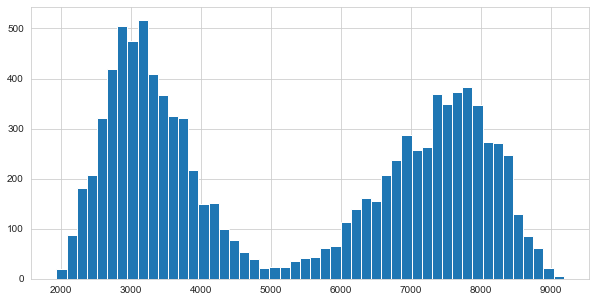

In [30]:
df['TotalCharge'].hist(bins=50, figsize=(10,5));

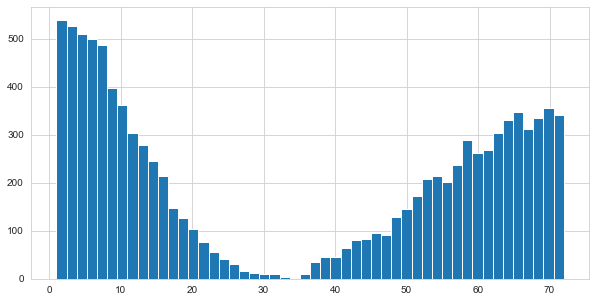

In [31]:
df['Initial_days'].hist(bins=50, figsize=(10,5));

### Bivariate Visualisations

### Notice Gender Counts:

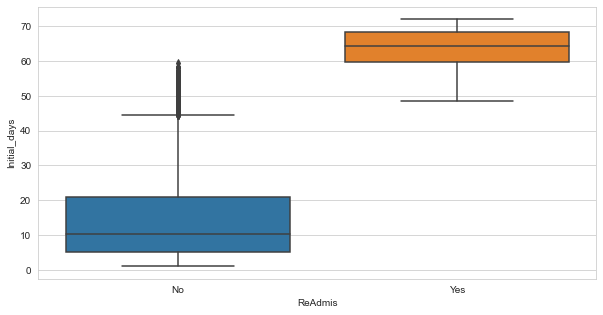

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ReAdmis', y='Initial_days', data=df);

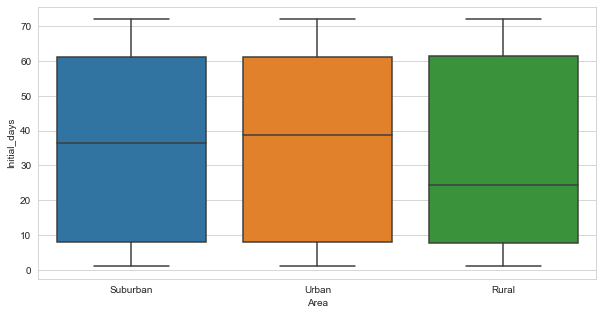

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Area', y='Initial_days', data=df);

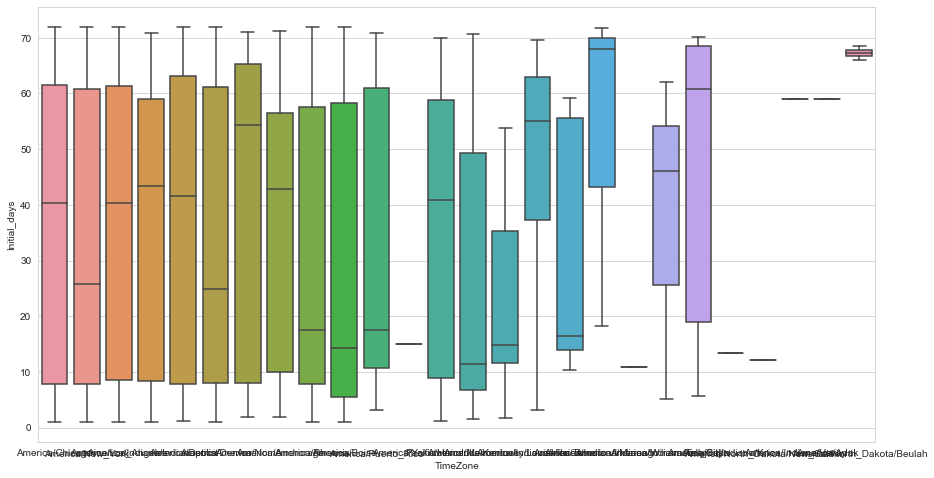

In [34]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='TimeZone', y='Initial_days', data=df);

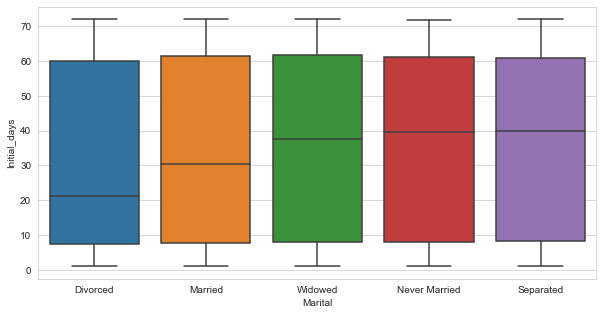

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Marital', y='Initial_days', data=df);

In [15]:
train['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

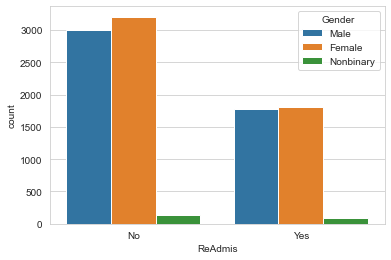

In [17]:
sns.countplot(x='ReAdmis', hue='Gender', data=train);

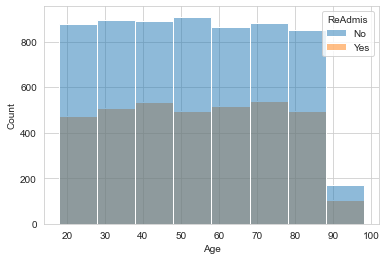

In [22]:
sns.histplot(hue="ReAdmis", x="Age", binwidth=10, data=train);
plt.show()

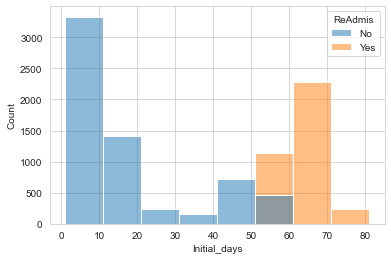

In [18]:
sns.histplot(hue="ReAdmis", x="Initial_days", binwidth=10, data=train);
plt.show()

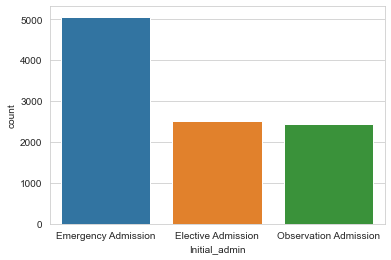

In [23]:
sns.countplot(x='Initial_admin', data=train);

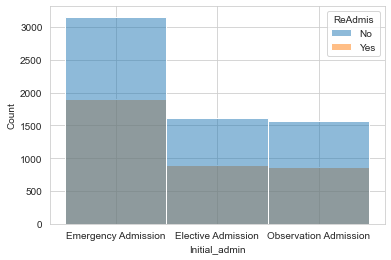

In [20]:
sns.histplot(hue="ReAdmis", x="Initial_admin", binwidth=10, data=train);
plt.show()

#### [D] Compare an initial and reduced multiple regression model

####   [D1] Construct an initial multiple regression model from _all_ predictors that were identified in [C2]

####   [D2] Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.

####   [D3] Provide a reduced multiple regression model that includes both categorical and continuous variables.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# 90% Train, 10% Test
focus_df2_train, focus_df2_test = train_test_split(focus_df2, test_size=0.10, random_state=123)

In [ ]:
focus_df2_train

In [ ]:
focus_df2_test

## Logistic Regression:

In [ ]:
X = pd.DataFrame(sales_train[['Days', 'Web']])
X = sm.add_constant(X)
y = pd.DataFrame(sales_train[['CC']])

In [ ]:
X = focus_df2_train[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]
y = focus_df2_train[['TotalCharge']]
# Add Constant
X = sm.add_constant(X)

In [ ]:
model01 = sm.OLS(y, X).fit()
model01.summary()

In [ ]:
# Verify Regression Model Results on Test Data:
X_test = pd.DataFrame(focus_df2_test[['Initial_days', 'Overweight_Num', 'Diabetes_Num']])
y_test = pd.DataFrame(focus_df2_test[['TotalCharge']])
X_test = sm.add_constant(X_test)
model01_test = sm.OLS(y_test, X_test).fit()
model01_test.summary()

#### **Stepwise Regression** in Python?

#### Estimation Model Evaluation

In [ ]:
# X = focus_df2_train[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]
# y = focus_df2_train[['TotalCharge']]
# # Add Constant
# X = sm.add_constant(X)
focus_df2.head(1)

In [ ]:
pat01 = np.column_stack((1, 10.58577, 0, 1))
model01.predict(pat01)

In [ ]:
ypred = model01.predict(X_test)
ypred
# The result is a column of predictions, one for each record in the test data set. 
# These values will allow us to calculate the MAE later in this section.

In [ ]:
# Calculate Standard Error of the Estimate
np.sqrt(model01.scale)

In [ ]:
# 90% Train, 10% Test
focus_df2_train, focus_df2_test = train_test_split(focus_df2, test_size=0.10, random_state=123)

In [ ]:
# Target variable values
ytrue = focus_df2_test[['TotalCharge']]
# MAE
mean_absolute_error(y_true = ytrue, y_pred = ypred)

#### Identify Multicollinearity 

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as inf

In [ ]:
X = pd.DataFrame(focus_df2[['Initial_days', 'Overweight_Num', 'Diabetes_Num']]);
pd.plotting.scatter_matrix(X);

In [ ]:
X = X.dropna()
X = sm.add_constant(X)
[inf.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# The output will include a VIF value for the constant term we added; ignore it. 
# The VIF values of interest are for the three predictor variables, which are 
# the second, third, and fourth numbers output by the variance_inflation_factor() command.

---
### **Part IV: Model Comparison and Analysis**
---

<ol> [D] Compare an Initial and a reduced multiple regression model by doing the following:
    <li>Construct an initial multiple regression model from all predictors that were identified in Part C2.</li>
    <li>Justify a statistically based variable selection procedure and a model evaluation metric to reduce the initial model in a way that aligns with the research question.</li>
    <li>Provide a reduced multiple regression model that includes both categorical and continuous variables.
        </br>
        __Note: The output should include a screenshot of each model.__
</li>
</ol>
<ol> [E] Analyze the data set using your reduced multiple regression model by doing the following:
<li>Explain your data analysis process by comparing the initial and reduced multiple regression models,
    including the following elements:</li>
    <ul>
        <li>the logic of the variable selection technique</li>
        <li>the model evaluation metric</li>
        <li>a residual plot</li>
    </ul>
<li>Provide the output and any calculations of the analysis you performed, including the model’s residual error. 
</br>
__Note: The output should include the predictions from the refined model you used to perform the analysis.__</li>
<li>Provide the code used to support the implementation of the multiple regression models.</li>

    
    